In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Text(0.5, 0, 'частота')

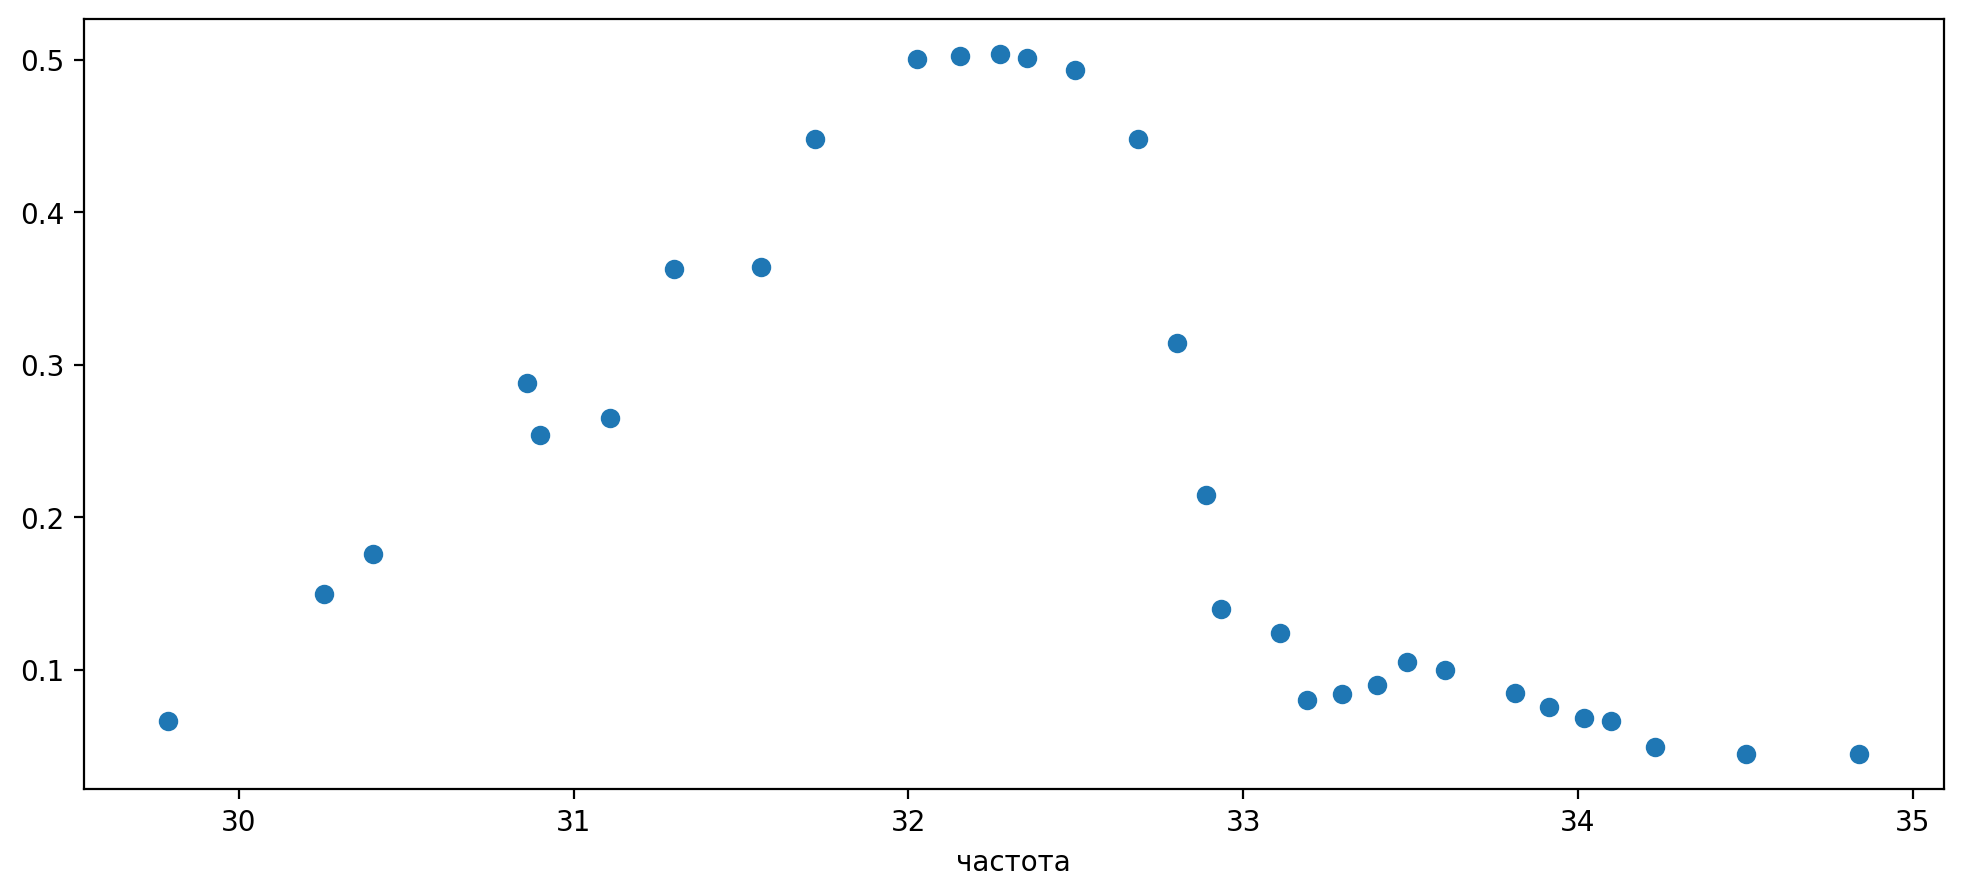

In [23]:
data = pd.read_csv("angle_30.csv")
plt.figure(figsize = (12, 5), dpi = 200)
plt.scatter(data['freq[MHz]'], 0.25 - data['U[V]'])
plt.xlabel("частота")